## **Python para Data Science: Clase 06**

### Librerías: Repaso Pandas

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase4/pandas_dalle3.png?raw=true" width="500"/>
</div>

La librería Pandas se utiliza para el análisis y manipulación de datos. Se basa en dos estructuras de datos eficientes y proporciona herramientas esenciales para trabajar con datos tabulares (similares a las tablas de bases de datos o hojas de cálculo): `Series` y `Dataframe`

### Series

Una Serie es similar a un arreglo unidimensional, pero con etiquetas. Esto último permite acceder a los elementos de una forma muy similar a los diccionarios, sin embargo, a diferencia de estos, una Serie **si** permite elementos duplicados.



In [1]:
import pandas as pd
# Generamos una serie
serie = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
print(serie)

# Podemos mirar cuales son los indices
print(serie.index)

# Asi como tambien sus valores
print(serie.values)


a    1
b    2
c    3
d    4
dtype: int64
Index(['a', 'b', 'c', 'd'], dtype='object')
[1 2 3 4]


Importante destacar que los valores de una serie (guardados en `serie.values`) son del tipo Numpy array. Esto nos permite hacer las misma cosas que podemos hacer en Numpy!

In [2]:
serie1 = pd.Series([1, 2, 3, 4]) # si no se especifican indices, entonces usa numeros de forma incremental
serie2 = pd.Series([2, 3, 4, 5])
serie1 + serie2

0    3
1    5
2    7
3    9
dtype: int64

Importante notar que las operaciones son sobre los indices que coinciden entre una serie y otra. Si no hay indices coincidentes el resultado será nulo (`np.nan`)

### DataFrame
Un DataFrame es como un diccionario de Series. Podemos entenderlo como una tabla de datos donde las columnas son Series que comparten un índice común.


In [3]:
data = {
    'columna1': [1, 2, 3, 4],
    'columna2': ['a', 'b', 'c', 'd']
}

df = pd.DataFrame(data, index=["id1", "id2", "id3", "id4"])
df

,columna1,columna2
id1,1,a
id2,2,b
id3,3,c
id4,4,d


### Cargando archivos

Pandas permite cargar archivos de distintas fuentes, basta con usar la función de Pandas correcta según el tipo de archivo:

```python
# Cargar desde un archivo CSV
df = pd.read_csv('ruta/del/archivo.csv')

# Cargar desde un archivo Excel
# NOTA: Es importante que el Excel tenga un buen formato
df = pd.read_excel('ruta/del/archivo.xlsx')

# Cargar desde un archivo Stata
df = pd.read_stata('ruta/del/archivo.dta')

# Cargar desde un archivo SQL
df = pd.read_sql('ruta/del/archivo.sql')
```

En este caso `ruta/del/archivo` corresponde a la ubicación del archivo dentro de nuestro computador. No obstante, podemos también cargar un archivo desde un link:

```python
# Cargar desde un archivo CSV en internet
df = pd.read_csv('https://url_al_archivo_csv')
```

In [4]:
# 1. Datos de población en Chile por Región y Comuna
df = pd.read_csv('https://dagshub.com/itare/MinCienciaCovid19/raw/50d5e0435cf89a5222bf5e19eda102510774f899/input/DistribucionDEIS/baseFiles/DEIS_template.csv')
print(df.shape) # Mostrar las dimensiones
# 2. Mostrar las primeras (5) filas
df.head()

(393, 5)


,Region,Codigo region,Comuna,Codigo comuna,Poblacion
0,Arica y Parinacota,15.0,Arica,15101.0,247552.0
1,Arica y Parinacota,15.0,Camarones,15102.0,1233.0
2,Arica y Parinacota,15.0,General Lagos,15202.0,810.0
3,Arica y Parinacota,15.0,Putre,15201.0,2515.0
4,Arica y Parinacota,15.0,Desconocido Arica y Parinacota,NaN,NaN


In [5]:
# 3. Eliminamos las filas que tienen nan en la columna Poblacion
df = df.dropna(subset=["Poblacion"])
# 4. Descartamos los valores donde Comuna == Total
df = df[df["Comuna"] != "Total"]
print(df.shape) # Ahora si hay 346 comunas!
df["Poblacion"].sum() # Parece andar bien

(346, 5)


np.float64(19458310.0)

In [6]:
# Agregamos a nivel de región, y obtenemos la población total junto
# a la cantidad total de comunas
resultado = df.groupby("Region").agg(total_poblacion=("Poblacion", "sum"),
                                     total_comunas=("Comuna", "count"))

<Axes: xlabel='total_poblacion', ylabel='total_comunas'>

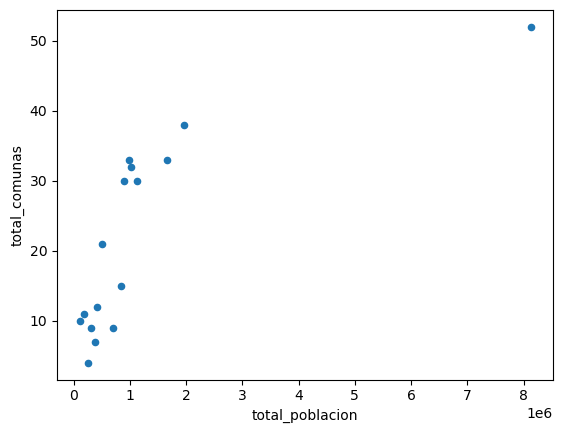

In [7]:
resultado.plot.scatter("total_poblacion", "total_comunas") # Gráfico de dispersión

### **Librerías: Visualización de datos**

La visualización es una parte esencial de cualquier análisis de datos, ya que facilita la comprensión de complejas estructuras de datos y resalta patrones, tendencias y anomalías en los datos. En sí, la visualización nos permite

1. Una comprensión rápida de los datos
2. Descubrimiento de patrones
3. Tomar mejores decisiones

La librería más común para la visualización de datos es [**Matplotlib**](https://matplotlib.org/).

### Matplotlib


![](https://matplotlib.org/stable/_images/sphx_glr_scatter_demo2_001.png)
> *Ejemplo de un gráfico realizado con matplotlib*

Matplotlib es la librería más usada en cuanto visualización. Tiene una enorme versatilidad, permitiendole al usuario crear desde histogramas y diagramas de dispersión hasta gráficos tridimensionales. Para importar el módulo que permite realizar gráficos debemos importar `pyplot` desde `matplotlib`, la forma más usual de hacer esto es:
```python
import matplotlib.pyplot as plt
```

Algunos de los tipos de gráficos que se pueden crear con Matplotlib son:

1. `plot`: Líneas
2. `hist`: Histograma
3. `scatter`: Dispersión
4. `bar` y `barh`: Barras (y barras horizontales)
5. `pie`: Torta
6. `boxplot`: Diagramas de caja
7. `errorbar`: Gráficos de error
8. `imshow`: Imágenes

Pueden visitar la [documentación de Matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html#adding-data-to-the-plot) para más información.

Adicionalmente a crear un gráfico, podemos personalizarlo modificando la escala del gráfico (por ejemplo, pasar a escala logarítmica uno de los ejes), cambiar las etiquetas de los ejes, agregar un título, una leyenda, etc.

#### **Gráfico de Líneas**

A continuación se explica la creación de un Gráfico de Líneas. Con el método `plt.plot()` dibuja una línea conectando los puntos definidos por las listas x (eje X) e y (eje Y). Dentro del método `plt.plot()` esta la propiedad `marker='.'` que agrega un marcador en cada punto de datos. Y la propiedad `ls="--"` que agrega la línea discontinua (guiones).

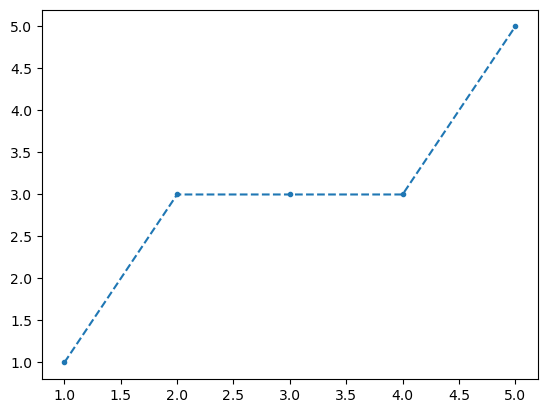

In [8]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [1,3,3,3,5]

plt.plot(x, y, marker='.', ls="--") # gráfico de línea con marcadores
plt.show() # mostramos el gráfico

In [9]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

In [10]:
import numpy as np

# generamos 1000 elementos con media 0 y std 1
x = np.random.normal(0, 1, 1000)
# generamos 1000 elementos con media 1 y std 1
y = np.random.normal(1, 1, 1000)

#### **Histograma**

En el ejemplo a continuación se muestra la creación de un histograma. Con el método `plt.hist()` se crea un histograma de los datos en `x`, dividiendo el rango de valores en 20 "bins" (barras). El histograma muestra la frecuencia de los valores de `x` en cada rango.

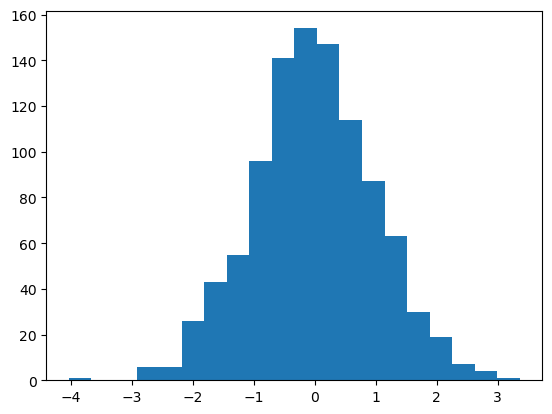

In [11]:
# histograma
plt.hist(x, bins=20)
plt.show()

#### **Dos Histogramas en la Misma Figura**

En este ejemplo se añaden dos histogramas diferentes en una misma figura. Se duplica el método `plt.hist()` uno para los elementos de `x` y otro para los elementos de `y`. Aquí se ocupa la propedad `alpha` para la opacidad, y dejar las barras semitransparentes.

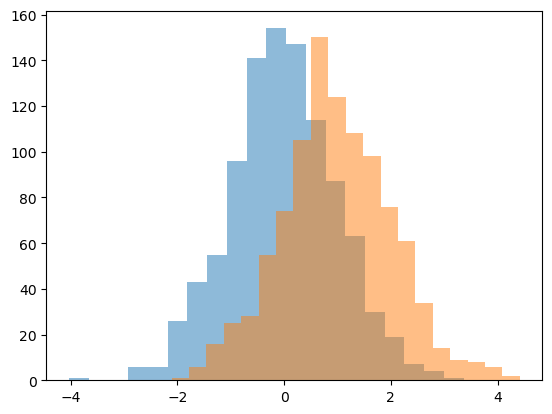

In [12]:
# Matplotlib genera un nuevo color por cada elemento agregado al gráfico
plt.hist(x, bins=20, alpha=0.5) #alpha es la opacidad
plt.hist(y, bins=20, alpha=0.5)
plt.show()

#### **Histogramas Personalizados**

En este último ejemplo de histograma, se personaliza aún más el gráfico, y se agrega por ejemplo: la propiedad `label`, que permite añadir una leyenda que estará sobre el gráfico. La propiedad `color`, permite añadir un código hexadecimal para indicar el color de cada barra.

Luego para que aparezcan los *labels* agregados anteriormente, se utiliza el método `plt.legend()` el cual tiene la propiedad `loc`, que permite pasar la posición donde se ubicará la leyenda. La propiedad `title` que va dentro del método `plt.legend()` añade un título a la leyenda.

Finalmente, se agregan un título general al gráfico con `plt.title()` y etiquetas a los ejes X e Y para mejorar la claridad y presentación con los métodos `plt.xlabel()` e `plt.ylabel()`.

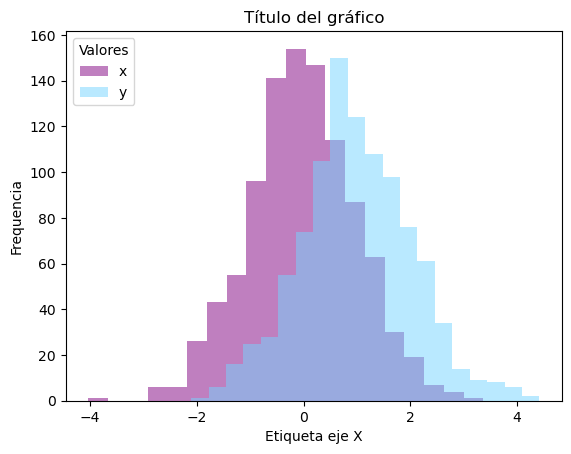

In [13]:
# Podemos estilizar nuestros histogramas
plt.hist(x,
         bins=20,        # número de rangos (rectángulos) a usar
         alpha=0.5,      # alpha agrega opacidad
         label="x",      # una etiqueta para la leyenda
         color="purple") # Nosotros mismos elegimos el color

# El color puede ser un nombre, así como un código hexadecimal
plt.hist(y, bins=20, alpha=0.5, label="y", color="#74d5ff")

plt.legend(loc="upper left", # Leyenda ubicada en la esquina superior izquierda
           title="Valores")  # Título para la leyenda

plt.title("Título del gráfico")
plt.xlabel("Etiqueta eje X")
plt.ylabel("Frequencia")
plt.show()

#### **Gráfico de Dispersión (Scatter Plot)**

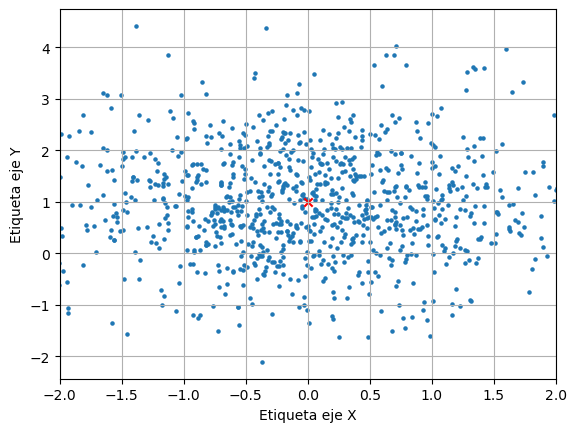

In [14]:
# Grafiquemos el scatter plot de x e y
plt.scatter(x, y, s=5)
# sabemos que el punto 0,1 debería ser el centro
plt.scatter(0, 1, marker="x", color="red")

plt.grid() # agregamos una grilla
plt.xlim([-2, 2]) # modificamos los límites del eje x
#plt.ylim([-1, 3]) # modificamos los límites del eje y
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

#### **Gráfico de Dispersión (Modificación del figsize)**

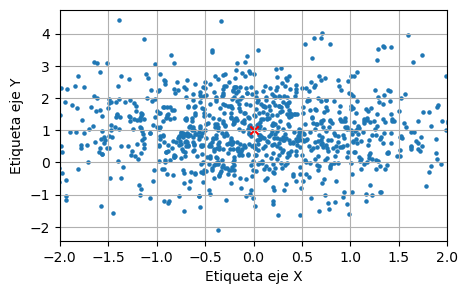

In [15]:
# Podemos modificar el tamaño usando figsize=(tamaño_x, tamaño_y)
fig, axes = plt.subplots(figsize=(5,3))
plt.scatter(x, y, s=5)
plt.scatter(0, 1, marker="x", color="red")
plt.grid()
plt.xlim([-2, 2])
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

#### **Gráfico de Dispersión (Utilizando ax)**

<class 'matplotlib.axes._axes.Axes'>


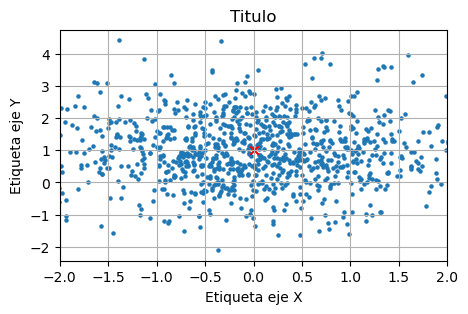

In [16]:
# Similar, pero usando el elemento ax (del tipo axes)
fig, ax = plt.subplots(figsize=(5,3))
print(type(ax))
ax.scatter(x, y, s=5)
ax.scatter(0, 1, marker="x", color="red")
ax.grid()
ax.set_xlim([-2, 2])
ax.set_xlabel("Etiqueta eje X")
ax.set_ylabel("Etiqueta eje Y")
ax.set_title("Titulo")
plt.savefig("resultado.pdf", bbox_inches="tight") #bbox_inches, saca los espacios blancos del contorno del gráfico
plt.show()

En Matplotlib, los `axes` (ejé en inglés) representan un gráfico (o subgráfico) dentro de una figura. Básicamente, corresponde a el espacio donde se dibujan los puntos de datos. La diferencia entre usar directamente `plt.` y `ax.` está en que el último te da más control, sobre todo en figuras que se componen de más de un gráfico.

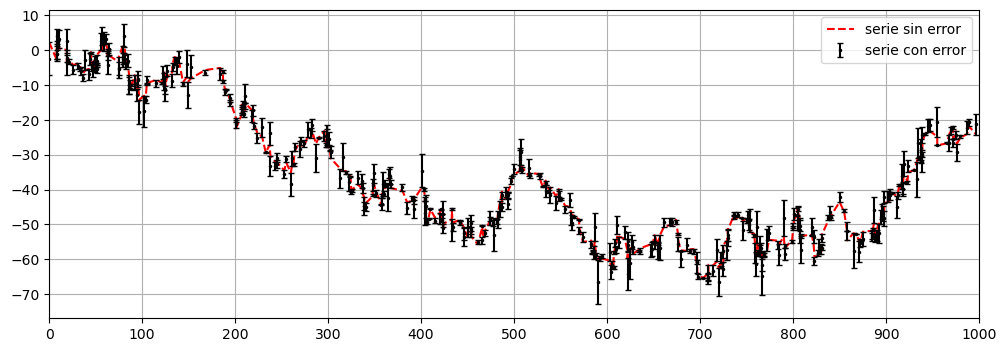

In [17]:
# Podemos simular una serie de tiempo

np.random.seed(2) # Para obtener siempre los mismos numeros aleatorios

x = np.random.choice(1000, 400) # 400 numeros aleatorios entre 0 y 1000
x = np.sort(x) # los ordenamos

y_error = np.random.normal(0, 2, len(x)) # generamos un error
y = np.cumsum(np.random.normal(0, 2,  len(x))) # generamos y
y += y_error # le agregamos el error

# Tambien podemos usar plt.figure para solo ajustar el tamaño de la figura
fig = plt.figure(figsize=(12,4))

# Graficamos la serie sin errores
plt.plot(x, y - y_error, linestyle="--", label="serie sin error", color="red")

# Graficamos la serie con errores usando plt.errobar
plt.errorbar(x, y, yerr=np.abs(y_error),
             linestyle='',
             marker='.', markersize=3,
             capsize=2, color="k",
             label="serie con error")

plt.legend()
plt.grid() # agregamos una grilla
plt.xlim([0, 1000]) # limitamos a que el eje x esté entre 0 y 1000
#plt.xticks([100,200,300,400,500,600,700,800,900,1000])
plt.xticks(range(0, 1001, 100)) # queremos una division cada 100 numeros
plt.show()

#### **Integración con Pandas**

Pandas integra Matplotlib directamente, de forma que podemos graficar usando los nombres de las columnas. Para ejemplificar, cargaremos el conjunto de datos de la Flor Iris, uno de los primeros conjunto de datos en la literatura, y ampliamente usado para ejemplificar

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase5/iris_dalle3.png?raw=true" width=400/>
</div>

In [18]:
import pandas as pd
df_iris = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")
print(df_iris.shape)
df_iris.sample(5) # Una muestra de 5 elementos

(150, 5)


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
67,5.8,2.7,4.1,1.0,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa
132,6.4,2.8,5.6,2.2,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
43,5.0,3.5,1.6,0.6,Iris-setosa


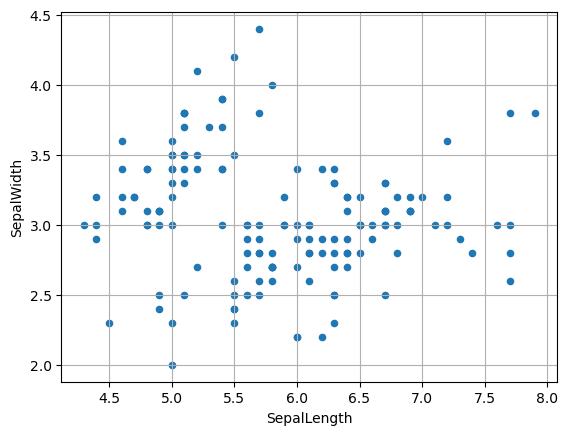

In [19]:
# graficamos directamente dos columnas
ax = df_iris.plot.scatter("SepalLength", "SepalWidth")
plt.grid() # agregamos una grilla
plt.show()

In [20]:
print(df_iris["Name"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


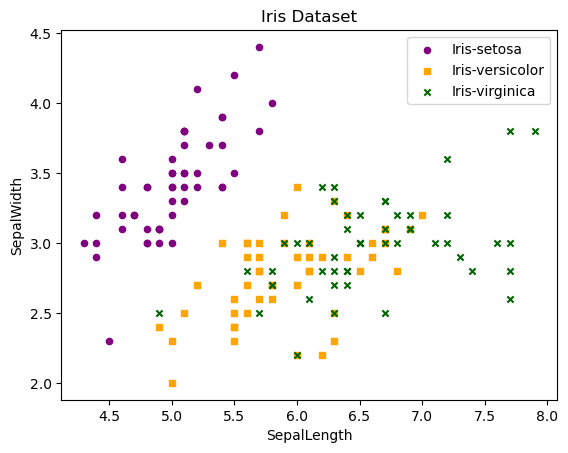

In [21]:
# Podemos agregar color según Name
# Debemos inicializar una figura, y decirle que grafique siempre en el mismo ax
fig, ax = plt.subplots() # tamaño por defecto

# Asignamos colores
colors = {"Iris-setosa": "purple",
          "Iris-versicolor" : "orange",
          "Iris-virginica" : "darkgreen"}

# Asignamos marcadores
markers = {"Iris-setosa": "o",
          "Iris-versicolor" : "s", # squares
          "Iris-virginica" : "x"}

for name in df_iris["Name"].unique():         # para cada nombre único
  df_name = df_iris[df_iris["Name"] == name]  # encontrar el subset de ese nombre
  df_name.plot.scatter("SepalLength",         # graficar SepalLength en x
                       "SepalWidth",          # graficar SepalWifth en y
                       ax=ax,                 # que grafique sobre ax
                       color=colors[name],    # que use el color asignado
                       marker=markers[name],  # que use el marcador asignado
                       label=name)            # que agregue el nombre como etiqueta
ax.set_title("Iris Dataset")
ax.legend() # Mostramos las etiquetas generadas
plt.show()

                 count   mean       std  min    25%  50%  75%  max
Name                                                              
Iris-setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
Iris-versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
Iris-virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9


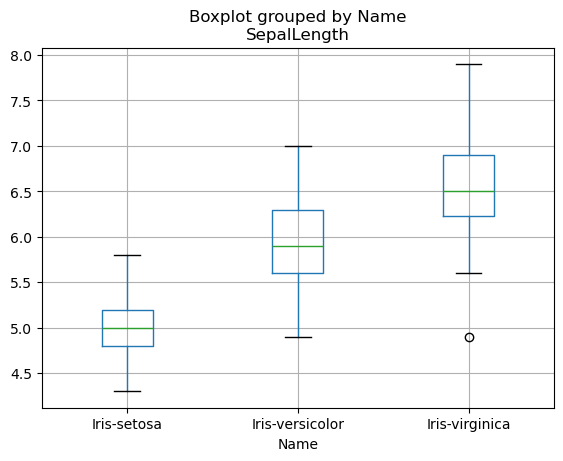

In [22]:
# Un boxplot de SepalLength según Name
print(df_iris.groupby("Name")["SepalLength"].describe())
df_iris.boxplot("SepalLength", "Name")
plt.show()

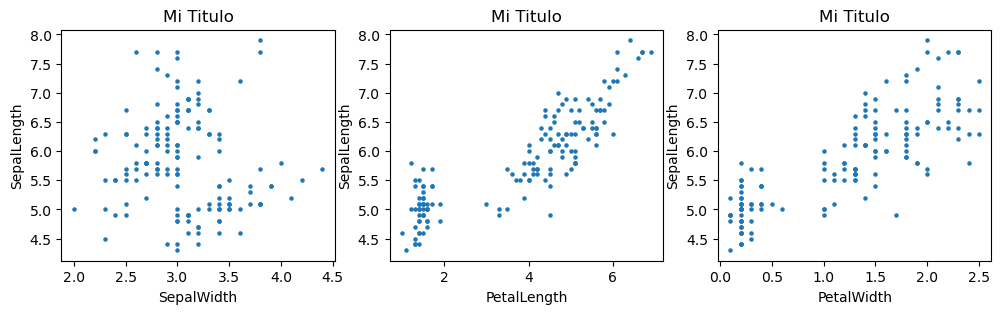

array([<Axes: title={'center': 'Mi Titulo'}, xlabel='SepalWidth', ylabel='SepalLength'>,
       <Axes: title={'center': 'Mi Titulo'}, xlabel='PetalLength', ylabel='SepalLength'>,
       <Axes: title={'center': 'Mi Titulo'}, xlabel='PetalWidth', ylabel='SepalLength'>],
      dtype=object)

In [23]:
# Gráficos en un esquema 1x3
# en este caso axes es una array de dimension 3
fig, axes = plt.subplots(1, 3, figsize=(12,3))
col_y = "SepalLength"
columnas = list(df_iris.columns[1:-1])
for i in range(len(columnas)):
   col_x = columnas[i]
   ax = axes[i]
   ax.scatter(df_iris[col_x], df_iris[col_y], s=5)
   ax.set_xlabel(col_x)
   ax.set_ylabel(col_y)
   ax.set_title('Mi Titulo')
#plt.subplots_adjust(wspace=0.5) #Espacio entre gráficos
plt.show()

# Veamos que hay en axes
axes

y que pasa si queremos que algo así funcione para cualquier dataframe?
Podemos crear una función!

<!--
def graficar_columnas(df, col_y, lista_columnas):
  columnas = list(lista_columnas) # nos aseguramos que es una lista
  total_cols = len(columnas)
  fig, axes = plt.subplots(1, total_cols, figsize=(4*total_cols, 3))
  for i in range(total_cols):
    col_x = columnas[i]
    axes[i].scatter(df[col_x], df[col_y], s=5)
    axes[i].set_xlabel(col_x)
    axes[i].set_ylabel(col_y)
  plt.show()
-->

In [24]:
def graficar_columnas(df, col_y, lista_columnas):
  ...

# Esto debería dar el mismo grafico anterior
graficar_columnas(df_iris, "SepalLength", ["SepalWidth", "PetalLength", "PetalWidth"])

### Seaborn

Seaborn es una librería basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos atractivos. De Seaborn podemos destacar que

1. Es estéticamente agradable: viene con estilos predefinidos que son visualmente atractivos.
2. Facilita la realización de gráficos complejos (como por ejemplo asignar colores a un gráfico de dispersión).
3. Tiene integración con Pandas!

La importación de Seaborn se hace típicamente con:
```python
import seaborn as sns
```

Dentro de su página web podemos encontrar una [galería de ejemplo](https://seaborn.pydata.org/examples/index.html), así como la [documentación](https://seaborn.pydata.org/api.html) de cada uno de los métodos

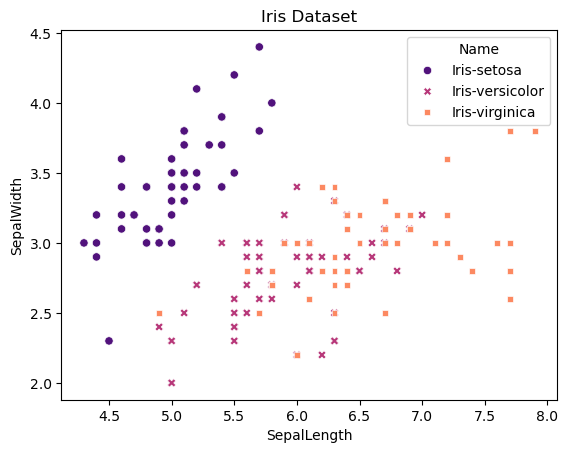

In [25]:
import seaborn as sns

# El mismo gráfico de dispersion con colores, pero con seaborn
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth",
                     hue="Name",     # Le decimos que coloree a nivel de Name
                     style="Name",   # Que el marcador también dependa de Name
                     palette="magma" # Podemos definir una paleta de colores
                     )
ax.set_title("Iris Dataset")
plt.show()

La paletas de colores puede ser un [mapa de colores de Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html), así como una [paleta definida con Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html).

*Nota: En Matplotlib (y en Pandas DataFrame.plot), este campo se llama `cmap`*

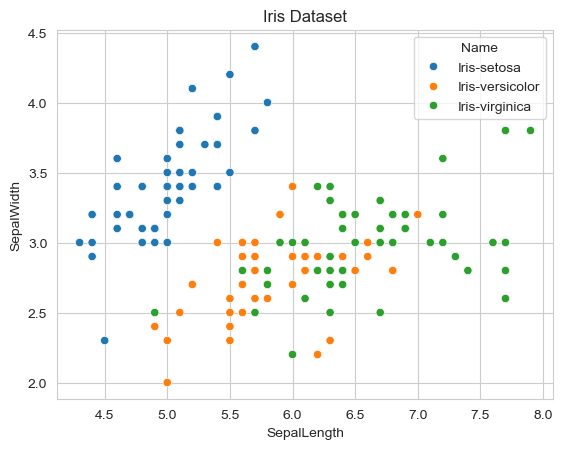

In [26]:
# Podemos setear un estilo
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name")
ax.set_title("Iris Dataset")
plt.show()

                 count   mean       std  min    25%  50%    75%  max
Name                                                                
Iris-setosa       50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
Iris-versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
Iris-virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8


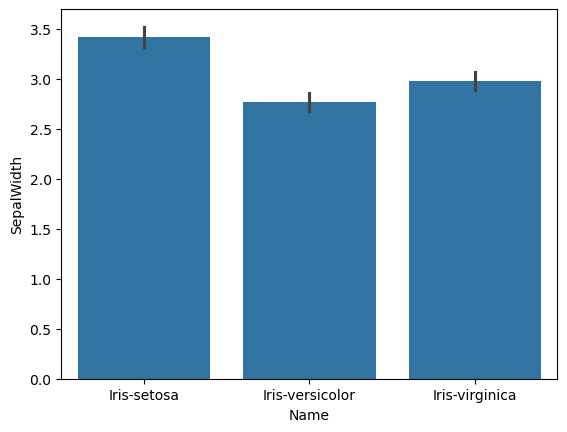

In [27]:
sns.reset_defaults() # Volvemos al estilo por defecto

print(df_iris.groupby("Name")["SepalWidth"].describe())

# Dado que hay varios valores de SepalWidth, por defecto graficará el promedio
# junto a un intervalo de confianza del 95%
ax = sns.barplot(data=df_iris, x="Name", y="SepalWidth" )
plt.show()

Name
Iris-setosa        4.4
Iris-versicolor    3.4
Iris-virginica     3.8
Name: SepalWidth, dtype: float64


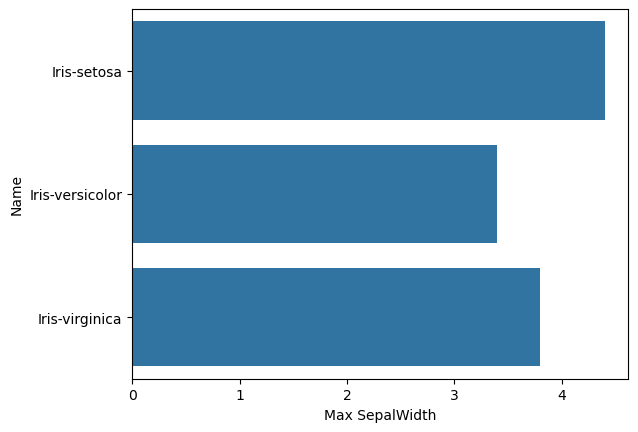

In [28]:
# Podemos modificarlo un tanto
ax = sns.barplot(data=df_iris,
                 y="Name", x="SepalWidth",
                 orient="h",       # Orientacion horizontal, cambiamos y por x
                 estimator="max",  # Que grafique el valor máximo
                 errorbar=None)    # Sin barras de error
ax.set_xlabel("Max SepalWidth")
print(df_iris.groupby("Name")["SepalWidth"].max())
plt.show()

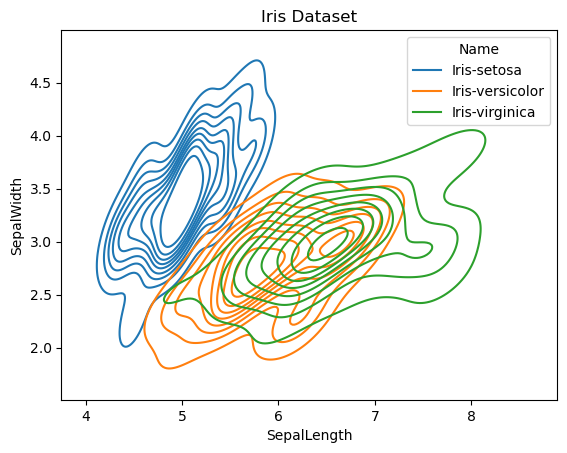

In [29]:
# Gráfico de densidad
ax = sns.kdeplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name")
ax.set_title("Iris Dataset")
plt.show()

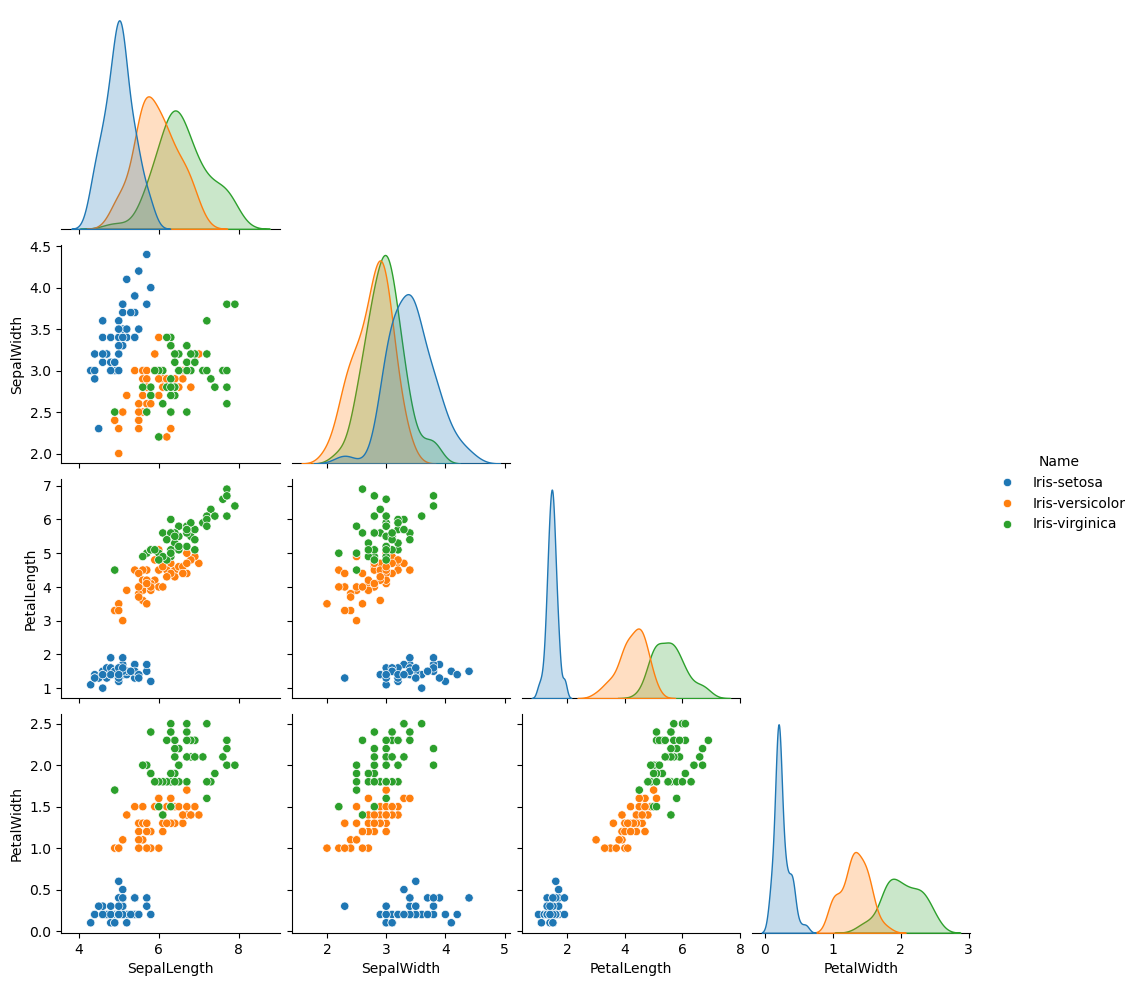

In [30]:
# Graficar las relaciones entre todas la columnas, usando una como color
# igual sirve para ver outliers
sns.pairplot(df_iris, hue="Name", corner=True) #corner true indica que se va imprimir solo el triangulo inferior de la matriz
plt.show()

### Plotly

Plotly es una librería que permite crear gráficos interactivos. Soporta múltiples lenguajes, entre ellos Python. Hay una galería con bastantes ejemplos: https://plotly.com/python/.

La forma más sencilla de usarlo es mediante [Plotly express](https://plotly.com/python/plotly-express/):

```python
import plotly.express as px
```

Corroborar que este instalado `nbformat`

In [1]:
import plotly.express as px

# Un scatter plot
fig = px.scatter(df_iris, x="SepalWidth", y="SepalLength",
                 color="Name", # simil a "hue" en seaborn
                 width=700,    # ancho del gráfico
                 title="SepalWidth vs SepalLength"
                 )
fig.show()

NameError: name 'df_iris' is not defined

In [ ]:
# El mismo boxplot de antes
fig = px.box(df_iris, x='Name', y='SepalWidth', width=700,
             title='Sepal Width distribution by Iris species')
fig.show()

In [ ]:
# Similar a sns.pairplot
fig = px.scatter_matrix(df_iris, dimensions=df_iris.columns[:-1], color='Name', width=1000, height=900)
fig.show()

## Extra: GeoPandas

Geopandas es una librería de Python basad en Pandas que facilita el trabajo con datos geoespaciales. Puden encontrar la documentación [acá](https://geopandas.
org/en/stable/docs.html).

Para usarla necesitamos un mapa vectorial (shapefile) e importarla:

```python
import geopandas as gpd
```

Veamos un ejemplo sencillo:

In [ ]:
import geopandas as gpd
import fsspec

url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/" \
"download/110m/cultural/ne_110m_admin_0_countries.zip"
    
with fsspec.open(f"simplecache::{url}") as file:
    gdf = gpd.read_file(file)


ClientResponseError: 500, message='Internal Server Error', url=URL('https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip')

In [ ]:
import geopandas as gpd

# usamos uno de los datasets de ejemplos que trae GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world = gpd.read_file(new_package.get_path('nybb'))

world.head()

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

Habrán notado la columna `geometry`. Dicha columna denota una figura geométrica que representa en este caso la forma de un país

In [ ]:
world['geometry']

NameError: name 'world' is not defined

In [ ]:
# Obtengamos por ejemplo, el índice 3 (canadá)
world['geometry'].iloc[3]

In [ ]:
# Podemos graficar directamente todas las formas geométricas
world.plot()
plt.title("Mapa del Mundo")
plt.show()

In [ ]:
# Coloreamos por continente
world.plot(column='continent', legend=True, figsize=(12,6))
plt.title("Mapa del Mundo")
plt.show()

In [ ]:
# Coloreamos por poblacion y cambiamos la paleta de colores
ax = world.plot(column='pop_est', cmap='OrRd', legend=True, figsize=(12,6))
# world.boundary.plot(ax=ax, color='k', lw=0.1)
plt.title("Mapa del Mundo")
plt.show()

Dado que actúa como un DataFrame, podemos aplicar los mismos filtros:

In [ ]:
south_america = world[world['continent'] == 'South America']
south_america

In [ ]:
# Graficamos solo los límites
ax = south_america.boundary.plot(lw=1, figsize=(6, 12))
# Etiquetamos usando el centro de la geometría
south_america.apply(lambda x: ax.annotate(text=x['iso_a3'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Removemos todos los ejes
ax.axis('off')
plt.show()

En el caso de Chile, pueden encontrar shapes files usando la plataforma de la biblioteca nacional: https://www.bcn.cl/siit/mapas_vectoriales

